In [12]:
from glob import glob

import pandas as pd
import matplotlib.pyplot as plt

In [13]:
train_results = {}
for file in glob("./grow_train_results/*.csv"):
    name = file.split("/")[-1].split(".")[0]
    train_results[name] = pd.read_csv(file)
    train_results[name].drop(train_results[name].tail(1).index, inplace=True)

In [14]:
bad_train_results = {model_name: results for model_name, results in train_results.items() if results.max()["loss"] > 10}
train_results = {model_name: results for model_name, results in train_results.items() if results.max()["loss"] < 10}
for model_name, results in train_results.items():
    print(model_name, results.max()["loss"])

eff_model 1.9350965023040767
80_60_40_low_rank 2.087656259536743
40-80_30-60_10-40_low_rank2 2.143343210220337
20_20_10_low_rank 2.1627700328826904
30_20_10_low_rank 2.157770156860352
40-80_30-60_10-40_low_rank 2.14199447631836
40_20_10_low_rank 2.1625633239746094
80_60_20_low_rank 2.101127862930298
40_30_10_low_rank 2.1413960456848145
80_60_10_low_rank 2.0975656509399414


In [15]:
bad_train_results.keys()

dict_keys([])

In [16]:
def plot(column: str):
    plt.figure(figsize=(12, 8))
    for model_name, results in train_results.items():
        # if model_name in {"40_30_10_low_rank", "40-80_30-60_10-40_low_rank", "40-80_30-60_10-40_low_rank2",
        #                   "80_60_40_low_rank"}:
        plt.plot(results[column], label=model_name)
    plt.legend()
    plt.title(column)
    plt.xlabel("Epoch")
    plt.ylabel(column)
    # plt.xticks(range(len(results[column])))
    plt.show()

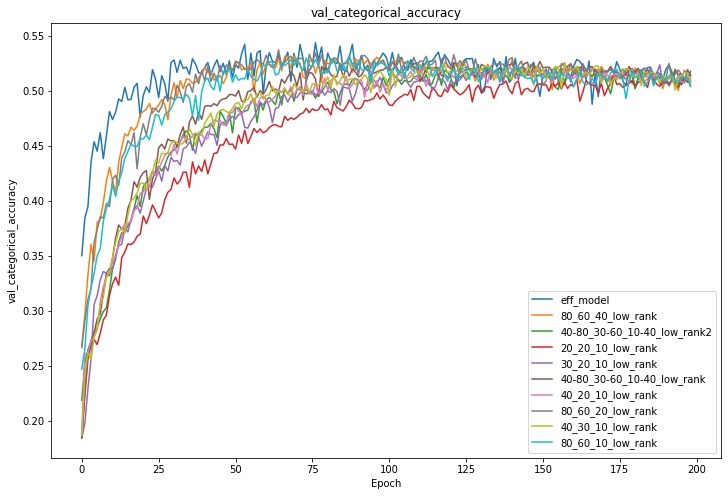

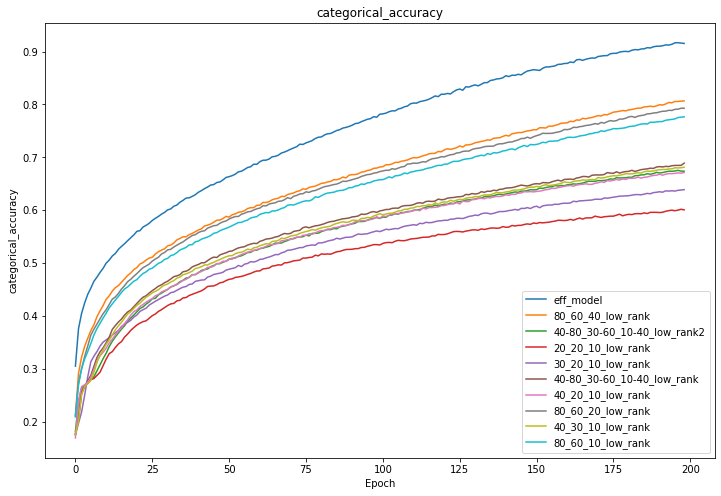

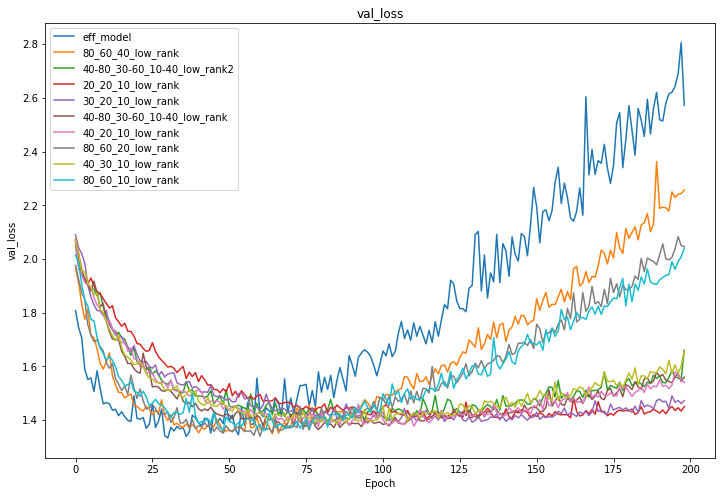

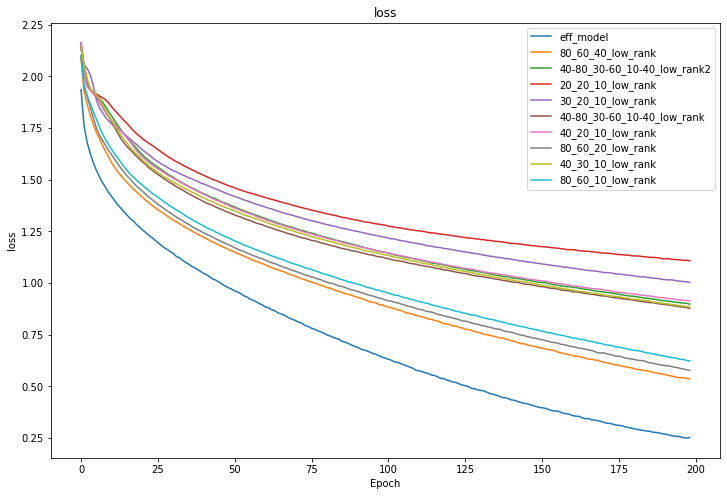

In [17]:
plot("val_categorical_accuracy")
plot("categorical_accuracy")
plot("val_loss")
plot("loss")